<a href="https://colab.research.google.com/github/GangisettySreeshanth/AIML_labs_Projects/blob/main/Copy_of_STP_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1, Lab 1: Introduction to Machine Learning and Feature Extraction

## What is Machine Learning?

Machine learning is a branch of artificial intelligence that enables computers to learn patterns from data without being explicitly programmed. Instead of writing specific rules, we train algorithms on examples to make predictions or decisions.

### Types of Machine Learning

**1. Supervised Learning**
- The algorithm learns from labeled data (input-output pairs)
- Goal: Learn a mapping function from inputs to outputs
- Two main types:
  - **Classification**: Predicting categories (e.g., spam/not spam, digit 0-9)
  - **Regression**: Predicting continuous values (e.g., house prices, temperature)

**2. Unsupervised Learning**
- The algorithm finds patterns in unlabeled data
- Goal: Discover hidden structure or relationships
- Examples: Clustering, dimensionality reduction

---

**Links**

Video - https://youtu.be/hsJidtpHHyo?si=O8Hp2aqvNUELkvmt

Text - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
## Quick ML Examples with Scikit-Learn

### Example 1: Classification with Iris Dataset

# Extracting features from data

Module 1, Lab 1<br>



In [118]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset (flower classification)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy:.2%}")
print(f"Predicted classes: {predictions[:5]}")
print(f"Actual classes: {y_test[:5]}")

Classification Accuracy: 100.00%
Predicted classes: [1 0 2 1 1]
Actual classes: [1 0 2 1 1]


### Example 2: Regression with Boston Housing Dataset

In [119]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data[:500], housing.target[:500]  # Use subset for speed

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"\nFirst 5 predictions: {predictions[:5]}")
print(f"First 5 actual values: {y_test[:5]}")

Mean Squared Error: 0.21
R² Score: 0.81

First 5 predictions: [2.52559351 0.97113716 1.45014085 3.19893231 1.90248745]
First 5 actual values: [2.5   0.675 1.22  4.103 3.357]


## Understanding Features in Machine Learning

### What are Features?

**Features** are measurable properties or characteristics of your data that you use as input for machine learning algorithms. Think of them as columns in a spreadsheet.

**Example**: If you're predicting house prices:
- Features might include: square footage, number of bedrooms, location, age of house
- Target/Label: the price (what you want to predict)


In [120]:
# Example feature representation
house_data = {
    'square_feet': [1500, 2000, 1200, 1800],
    'bedrooms': [3, 4, 2, 3],
    'age_years': [10, 5, 15, 8],
    'price': [300000, 450000, 250000, 380000]  # This is the target
}

### Why CSV Format?

CSV (Comma-Separated Values) is one of the most common formats for ML datasets because:

1. **Structured**: Data is organized in rows and columns (tabular format)
2. **Easy to read**: Both humans and machines can parse it easily
3. **Universal**: Works with all ML libraries (scikit-learn, pandas, TensorFlow, etc.)

**CSV Structure:**
```
feature1,feature2,feature3,target
1.2,3.4,5.6,0
2.3,4.5,6.7,1
3.4,5.6,7.8,0
```

Each row = one sample/observation
Each column = one feature
Last column = target/label (what we want to predict)

### Converting Raw Data to Features

In [121]:
import pandas as pd
import numpy as np

# Example: Text data → Features
texts = ["it's a bad product!", "bad product", "cheap quality"]

# Feature extraction (simple bag-of-words approach)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(texts)

print("Text features as array:")
print(text_features.toarray())
print("\nFeature names (vocabulary):")
print(vectorizer.get_feature_names_out())

# Convert to CSV-like format (DataFrame)
df = pd.DataFrame(text_features.toarray(),
                  columns=vectorizer.get_feature_names_out())
print("\nAs DataFrame (CSV-like structure):")
print(df)

Text features as array:
[[1 0 1 1 0]
 [1 0 0 1 0]
 [0 1 0 0 1]]

Feature names (vocabulary):
['bad' 'cheap' 'it' 'product' 'quality']

As DataFrame (CSV-like structure):
   bad  cheap  it  product  quality
0    1      0   1        1        0
1    1      0   0        1        0
2    0      1   0        0        1


### Real Example: Iris Dataset as CSV

In [122]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create DataFrame (like a CSV)
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

print("Iris dataset in CSV-like format:")
print(df_iris.head())

# Save as actual CSV
df_iris.to_csv('iris_dataset.csv', index=False)
print("\n✓ Saved as iris_dataset.csv")

Iris dataset in CSV-like format:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

✓ Saved as iris_dataset.csv


In [123]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [124]:
import wikipedia

topic1 = 'Cristiano Ronaldo'
topic2 = 'Virat Kohli'

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content with error handling"""
    wikipedia.set_lang(lang)
    try:
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for '{topic}', trying auto-suggest...")
        try:
            return wikipedia.page(topic, auto_suggest=True).content
        except Exception as e:
            print(f"Still failed for '{topic}': {e}")
            return ""

# Fetch content
eng1 = get_wikipedia_content(topic1, 'en')
eng2 = get_wikipedia_content(topic2, 'en')
fr1 = get_wikipedia_content(topic1, 'fr')
fr2 = get_wikipedia_content(topic2, 'fr')

print("✓ Successfully fetched all Wikipedia pages")
print(f"English {topic1} length: {len(eng1)} characters")
print(f"English {topic2} length: {len(eng2)} characters")
print(f"French {topic1} length: {len(fr1)} characters")
print(f"French {topic2} length: {len(fr2)} characters")


✓ Successfully fetched all Wikipedia pages
English Cristiano Ronaldo length: 67649 characters
English Virat Kohli length: 43260 characters
French Cristiano Ronaldo length: 126230 characters
French Virat Kohli length: 15262 characters


This is what the text looks like:

In [125]:
fr2

"Virat Kohli, né le 5 novembre 1988 à New Delhi en Inde, est un joueur de cricket international indien. Batteur droitier, il est considéré comme l'un des meilleurs joueurs de cricket de l'histoire.\nConnu comme le capitaine de l’équipe de cricket indienne championne du monde des moins de 19 ans en 2008, il confirme les espoirs placés en lui en tant que capitaine du club des Royal Challengers Bangalore dans l'Indian Premier League puis de l'équipe d'Inde entre 2013 et 2022.\nJoueur de la décennie 2010 désigné par le conseil international du cricket après avoir été élu joueur de l'année en 2017 et 2018, Virat Kohli reçoit les plus grandes distinctions sportives indiennes avec le prix Arjuna en 2013, le Padma Shri en sports en 2017 et le prix Khel Ratna l’année suivante.\nMarié avec l'actrice Anushka Sharma, Virat Kohli est une célébrité dans le Commonwealth. Icone de la jeunesse indienne, il est, en décembre 2021, le joueur de cricket ayant le plus d'abonnés sur Instagram. En plus d'être

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [126]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [127]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [128]:
print(eng1)

cristianoronaldodossantosaveiroportuguesepronunciationkitjnunaldubornfebruaryisaportugueseprofessionalfootballerwhoplaysasaforwardforandcaptainsbothsaudiproleagueclubalnassrandtheportugalnationalteamnicknamedcrheiswidelyregardedasoneofthegreatestplayersinhistoryandhaswonnumerousindividualaccoladesthroughouthiscareerincludingfiveballondorsarecordthreeuefamensplayeroftheyearawardsfoureuropeangoldenshoesandwasnamedfivetimestheworldsbestplayerbyfifahehaswontrophiesinhiscareerincludingfiveuefachampionsleaguesandtheuefaeuropeanchampionshipheholdstherecordsformostgoalsandassistsinthechampionsleaguegoalsandassistsintheeuropeanchampionshipandmostinternationalappearancesandinternationalgoalsheistheonlyplayertohavescoredgoalswithfourdifferentclubshehasmadeoverprofessionalcareerappearancesthemostbyanoutfieldplayerandhasscoredoverofficialseniorcareergoalsforclubandcountrymakinghimthetopgoalscorerofalltimeborninfunchalmadeiraronaldobeganhiscareerwithsportingcpbeforesigningwithmanchesterunitedinhebec

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [129]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

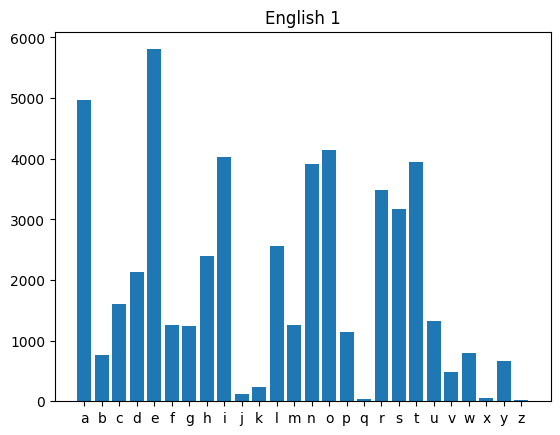

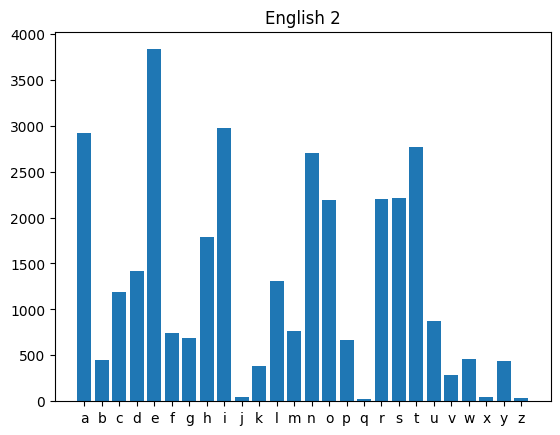

In [130]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

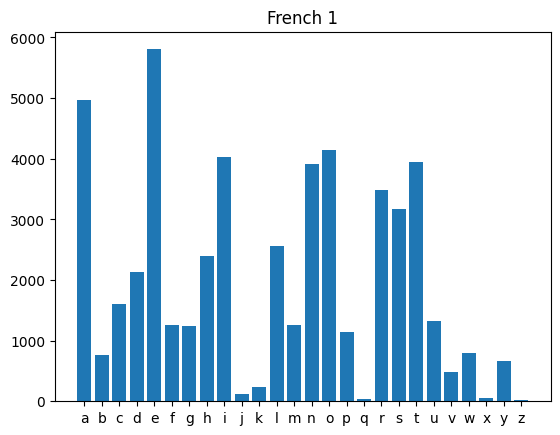

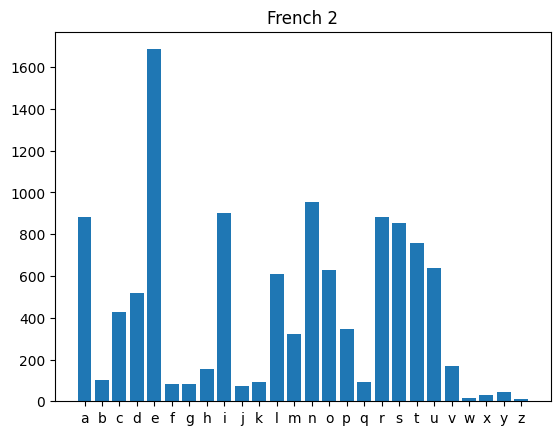

In [131]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

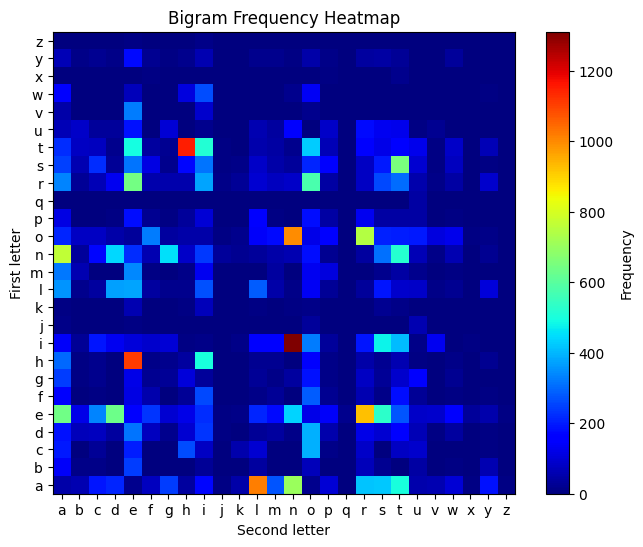

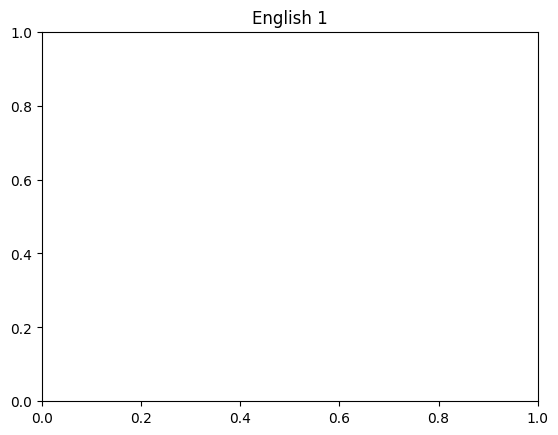

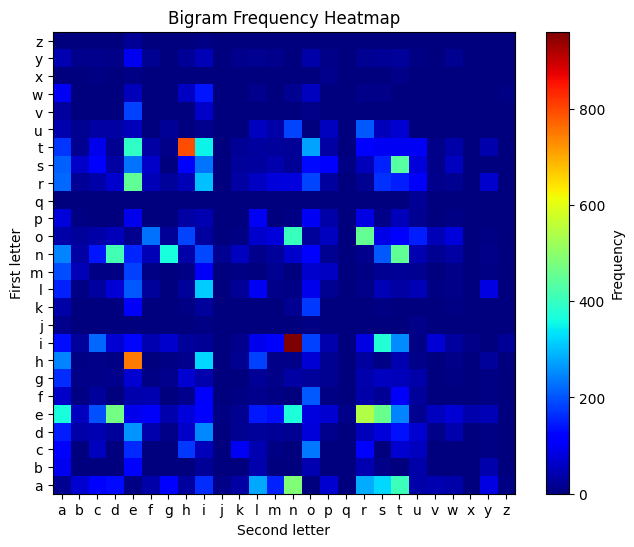

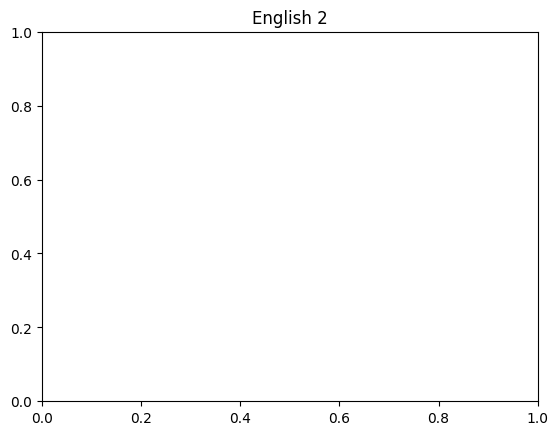

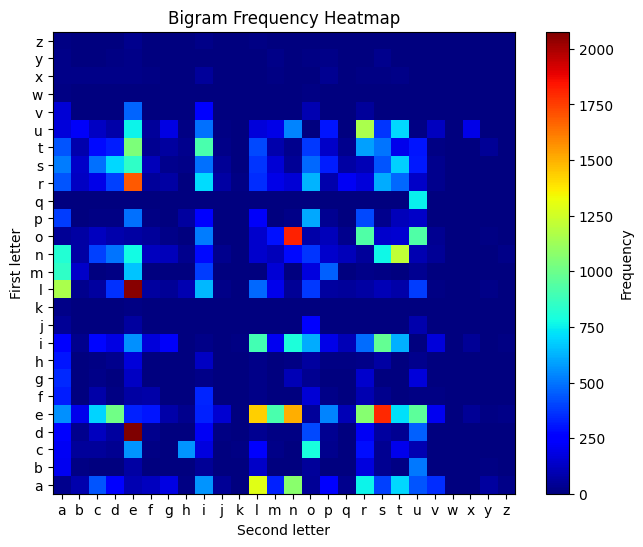

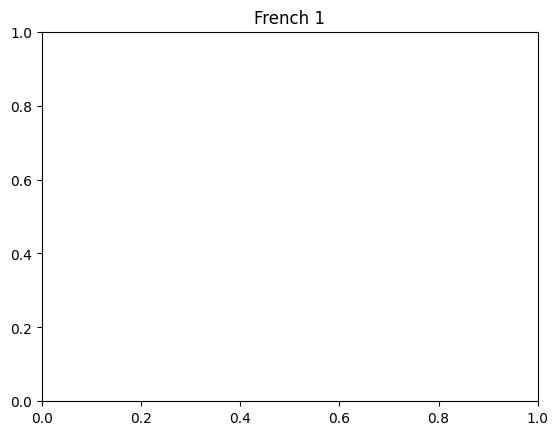

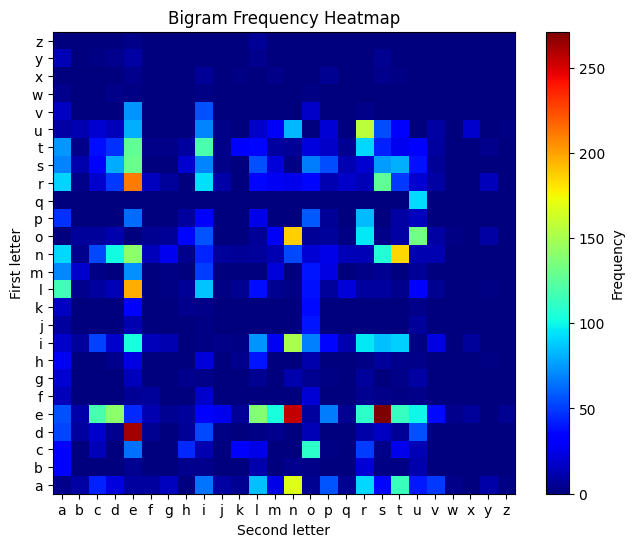

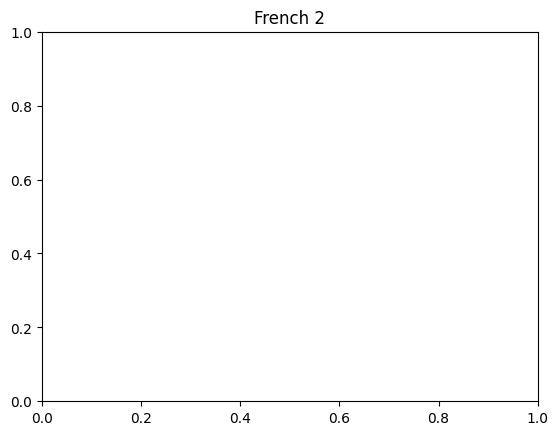

In [132]:
from collections import Counter
from nltk import ngrams
import matplotlib.pyplot as plt

# Preprocess: lowercase, only a-z
def clean_text(text):
    return re.sub('[^a-z]', '', text.lower())

eng1_clean = clean_text(eng1)
eng2_clean = clean_text(eng2)
fr1_clean = clean_text(fr1)
fr2_clean = clean_text(fr2)

# Compute bigrams
bigram_eng1 = Counter(ngrams(eng1_clean, 2))
bigram_eng2 = Counter(ngrams(eng2_clean, 2))
bigram_fr1  = Counter(ngrams(fr1_clean, 2))
bigram_fr2  = Counter(ngrams(fr2_clean, 2))

# Plot
plotbihistogram(bigram_eng1)
plt.title('English 1')
plt.show()

plotbihistogram(bigram_eng2)
plt.title('English 2')
plt.show()

plotbihistogram(bigram_fr1)
plt.title('French 1')
plt.show()

plotbihistogram(bigram_fr2)
plt.title('French 2')
plt.show()


Another way to visualize bigrams is to use a 2-dimensional graph.

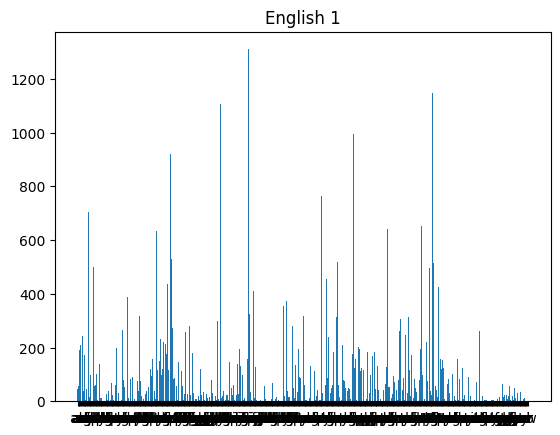

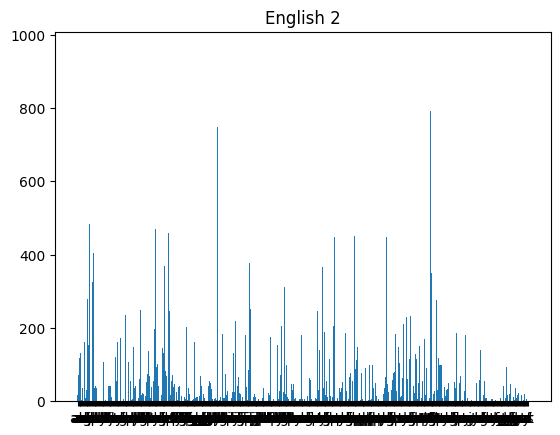

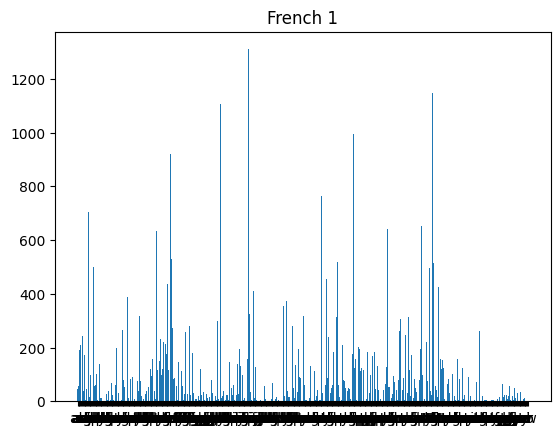

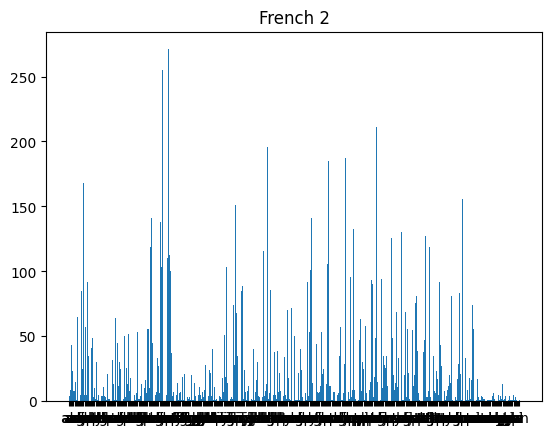

In [117]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()


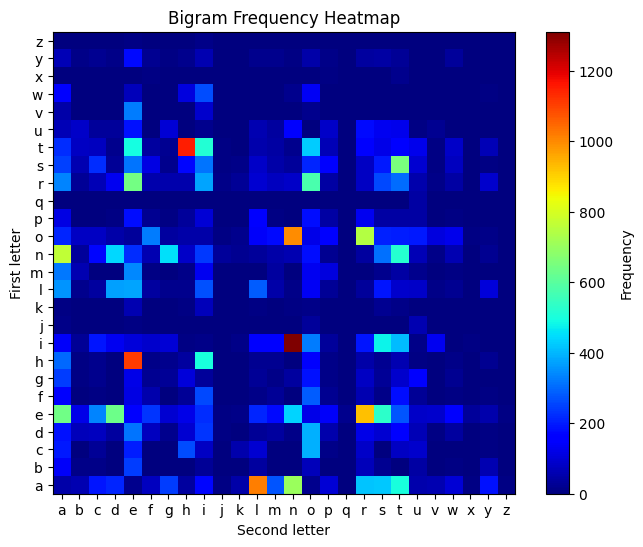

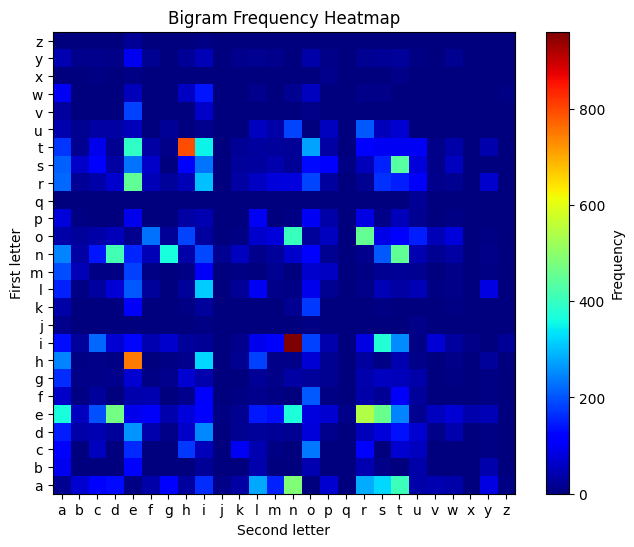

In [133]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

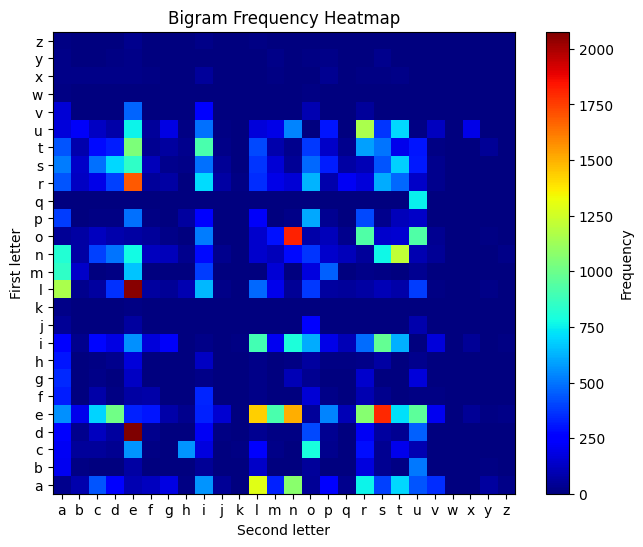

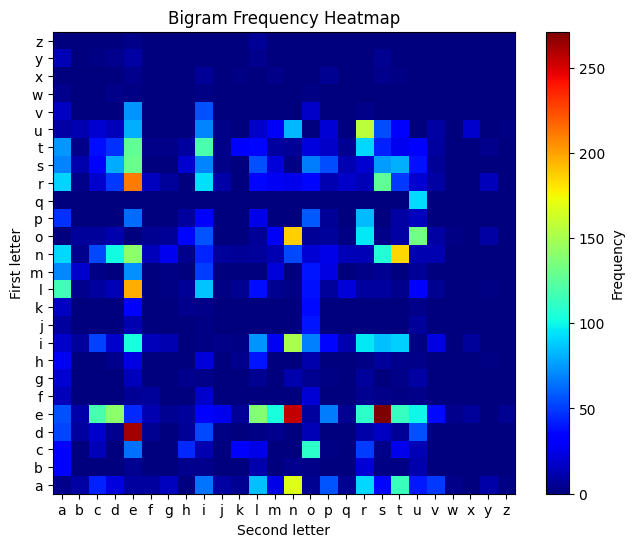

In [134]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [135]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [136]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('i', 'n') : 1310.0
('t', 'h') : 1149.0
('h', 'e') : 1106.0
('a', 'l') : 1018.0
('o', 'n') : 995.0
('e', 'r') : 922.0
('n', 'a') : 763.0
('o', 'r') : 747.0
('a', 'n') : 704.0
('s', 't') : 651.0

English 2:
('i', 'n') : 960.0
('t', 'h') : 792.0
('h', 'e') : 749.0
('e', 'r') : 541.0
('a', 'n') : 484.0
('e', 'd') : 471.0
('e', 's') : 459.0
('o', 'r') : 451.0
('n', 't') : 449.0
('r', 'e') : 447.0

French 1:
('d', 'e') : 2077.0
('l', 'e') : 2056.0
('o', 'n') : 1816.0
('e', 's') : 1794.0
('r', 'e') : 1691.0
('e', 'n') : 1507.0
('e', 'l') : 1432.0
('a', 'l') : 1294.0
('n', 't') : 1209.0
('u', 'r') : 1160.0

French 2:
('e', 's') : 271.0
('d', 'e') : 262.0
('e', 'n') : 255.0
('r', 'e') : 211.0
('l', 'e') : 196.0
('o', 'n') : 187.0
('n', 't') : 185.0
('a', 'n') : 168.0
('u', 'r') : 156.0
('i', 'n') : 151.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [137]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [138]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

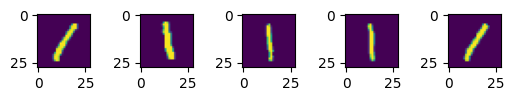

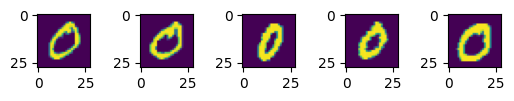

In [165]:
for ii in range(5):
  plt.subplot(6, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(6, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [140]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

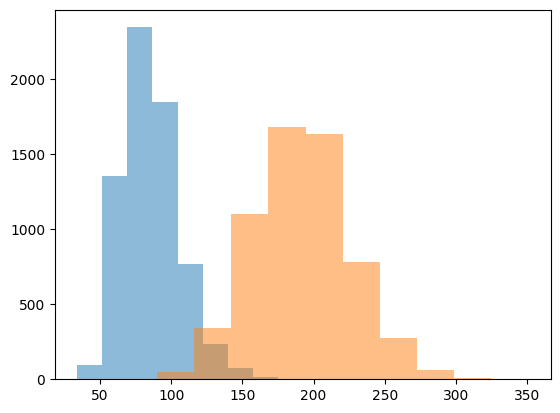

In [170]:
plt.hist(sum1, alpha=0.5);
plt.hist(sum0, alpha=0.5);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [142]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

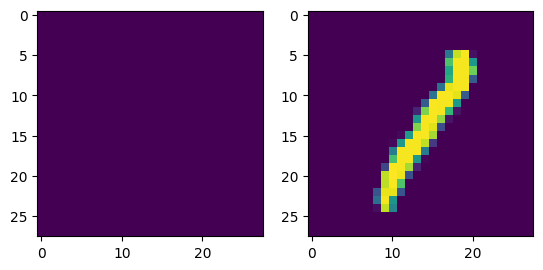

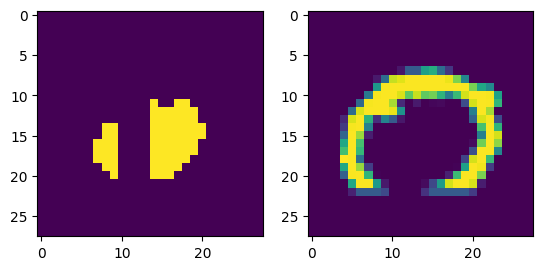

In [172]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

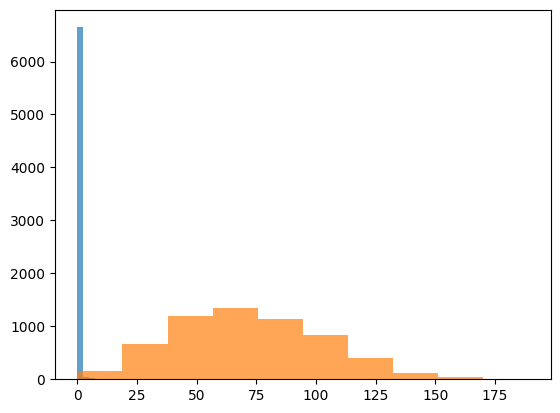

In [144]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [145]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

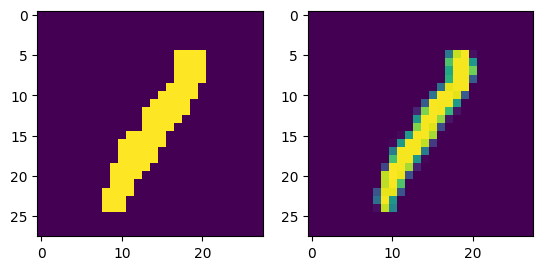

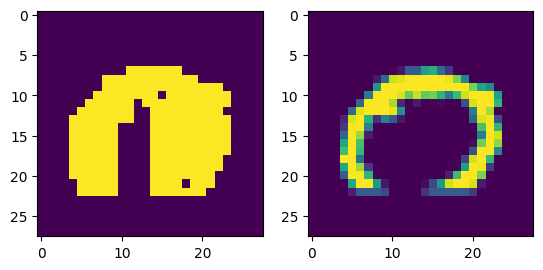

In [146]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

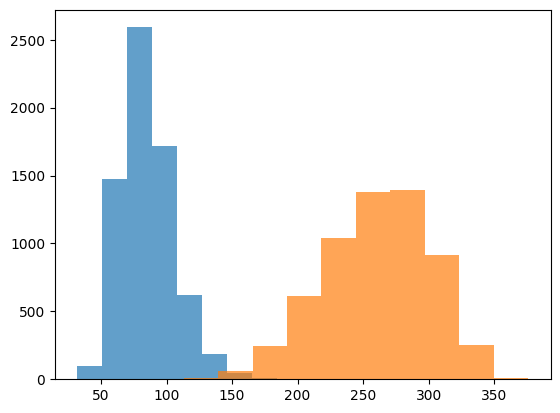

In [147]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [148]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

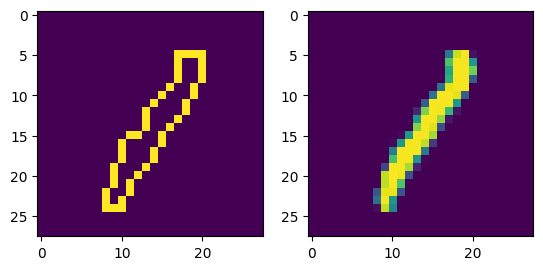

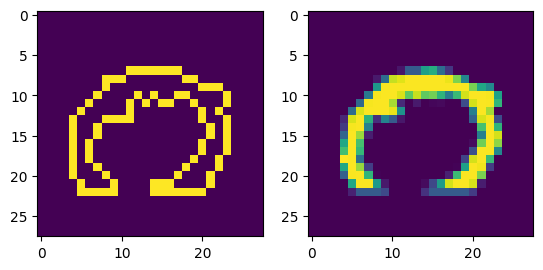

In [149]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

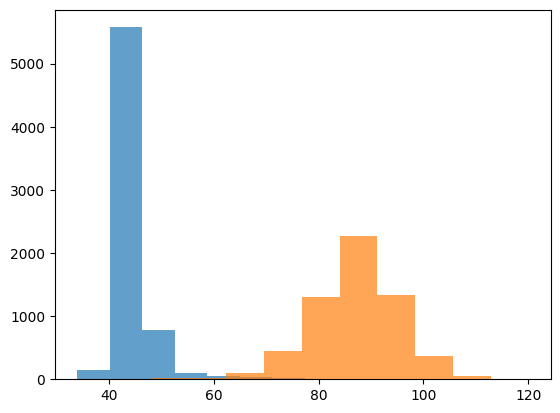

In [150]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

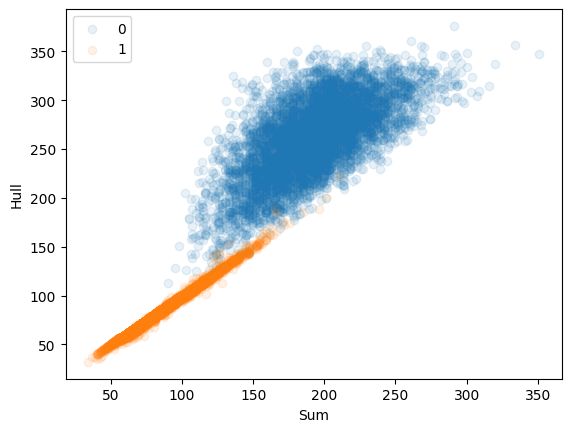

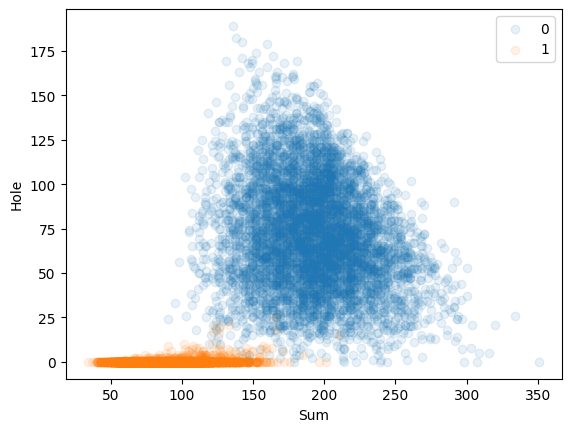

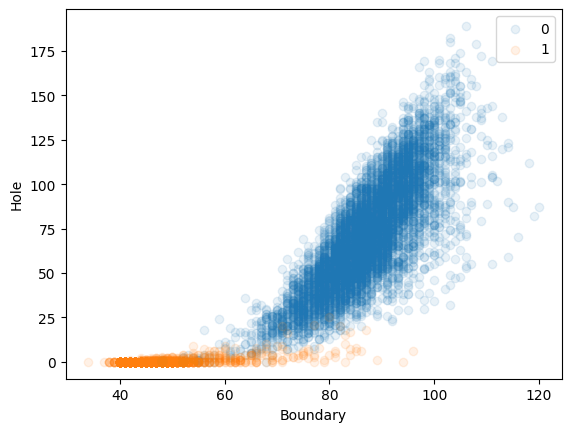

In [151]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [152]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?